# Salary Prediction Model

Group 20
<br/><br/>
Group Members
- Ong Kian Shon 1802258 P6
- Lim Jason 1802103 P6
- Lee Jia Sheng 1902018 P6
---

## Index

1. [Import Python Libraries](#Import-Python-Libraries)
2. [Data Collection](#Data-Collection)
3. [Data Exploration](#Data-Exploration)
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Declare Functions](#Training-Operation-Process-Functions)
7. [Model Training](#Model-Training)
8. [Fine Tune Model](#Fine-Tune-Model)
9. [Testing the Model](#Testing-the-Model)
10. [Conclusion](#Conclusion)
---

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.mode.chained_assignment = None #turn off warning for SettingWithCopyWarning, 
                                          #used when convert quality into categorical type
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
salary = pd.read_csv("Salary.csv", na_values = "?")

# Data Exploration

In [3]:
salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
9,NaN,61,166855,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,164,10,United-States,low


In [4]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [5]:
#original shape of dataset
print("Shape",salary.shape)

Shape (32561, 16)


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [7]:
salary.groupby('salary_range').size()

salary_range
high     7841
low     24720
dtype: int64

In [8]:
salary.columns

Index(['work_type', 'age', 'weight', 'education', 'education_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'investment_gain', 'investment_loss', 'company_size', 'weekly_hours',
       'country', 'salary_range'],
      dtype='object')

*Comment for the size of "salary_range":*<br>
- The class needs to be rebalanced **(avoid imbalanced class result / imbalanced classification challenge)**

## Numerical Feaures Analysis

In [9]:
salary.describe() 

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
count,32561.000000,3.256100e+04,32552.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080609,1077.648844,87.303830,500.930838,40.437456
std,13.640433,1.055500e+05,2.572762,7385.292085,402.960219,285.784842,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,5.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,254.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,502.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,745.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1000.000000,99.000000


Summary of the description of the data:
---
1. Age   : 17 - 90 years old
2. Weight: 1.376900e+04 - 1.484705e+06
3. Education_years: 1 - 16 years
4. investment_gain: 0.00 - 99999.00
5. investment_loss: 0.00 - 4356.00
6. company_size   : 5 - 1000 employees
7. weekly_hours   : 1 - 99 hours

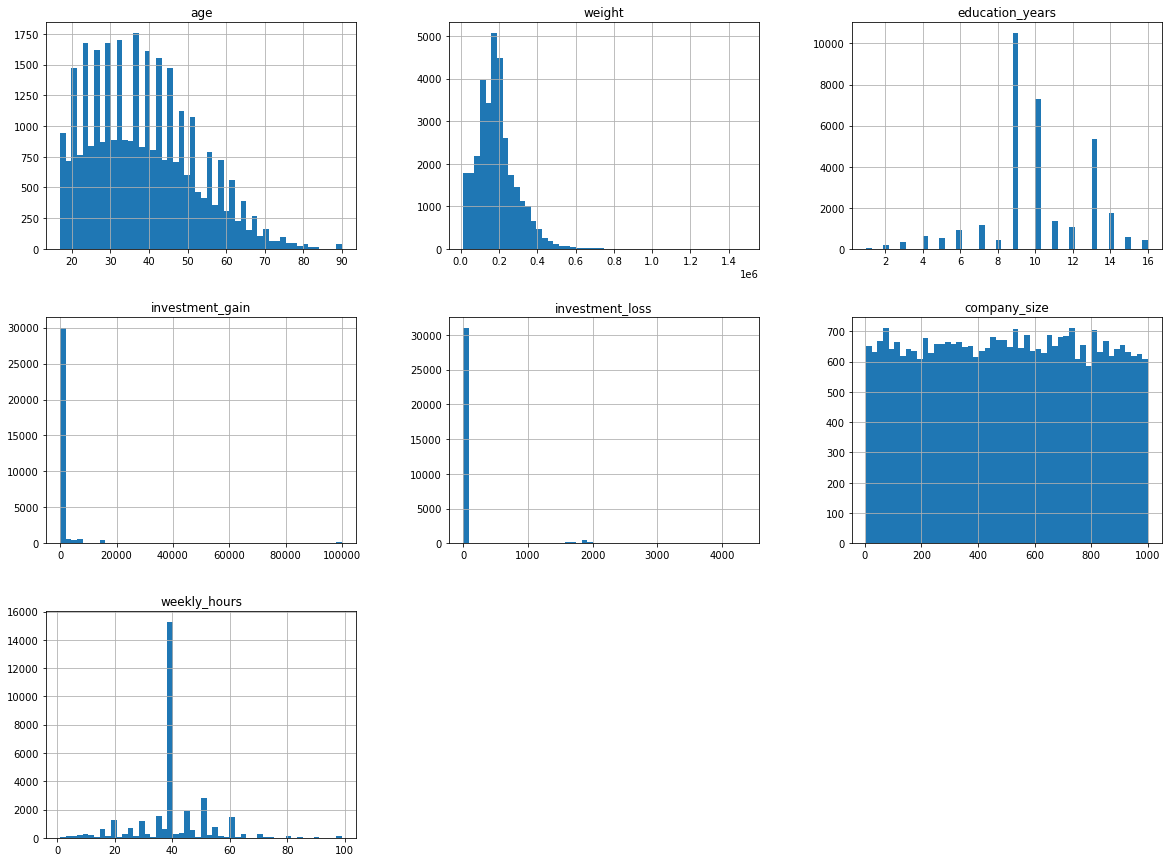

In [10]:
salary.hist(bins = 50, figsize = (20,15))
plt.show() 

# Data Visualization

## Correlation
1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [12]:
salary.corr()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.076646,0.036495,0.077674,0.057775,0.002589,0.068756
weight,-0.076646,1.000000,-0.043220,0.000432,-0.010252,0.004007,-0.018768
education_years,0.036495,-0.043220,1.000000,0.122649,0.079678,-0.007389,0.148050
investment_gain,0.077674,0.000432,0.122649,1.000000,-0.031615,0.004572,0.078409
investment_loss,0.057775,-0.010252,0.079678,-0.031615,1.000000,0.003726,0.054256
company_size,0.002589,0.004007,-0.007389,0.004572,0.003726,1.000000,0.000768
weekly_hours,0.068756,-0.018768,0.148050,0.078409,0.054256,0.000768,1.000000


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

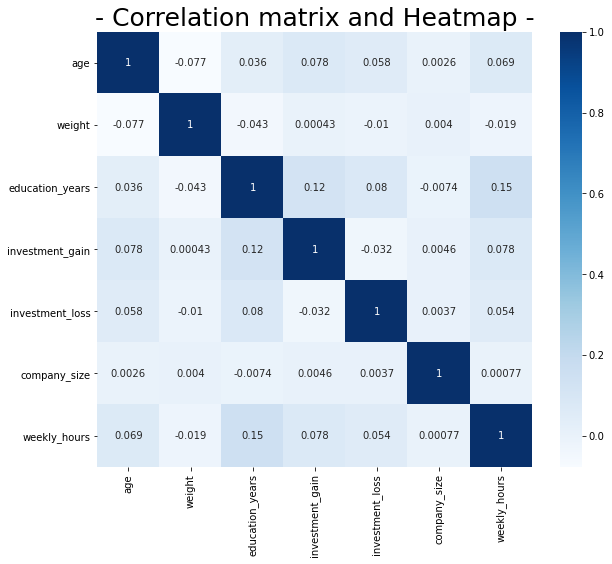

In [13]:
plt.figure(figsize =(10,8))
corrmat = salary.corr()
sb.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

### Positive Correlation
- Age and Investment Gain
- Age and Investment Loss
- Weekly Hours and Age
- Weekly Hours and Education Years
- Education Years and Investment Gain
- Education Years and Investment Lost

### Negative Correlation
- Age and Weight
- Weight and Investment Lost
- Weight and Weekly Hours
- Investment Gain and Investment Loss
- Education Years and Company Size

### Relationship between investment gain and salary range between male and females

<AxesSubplot:xlabel='salary_range', ylabel='investment_gain'>

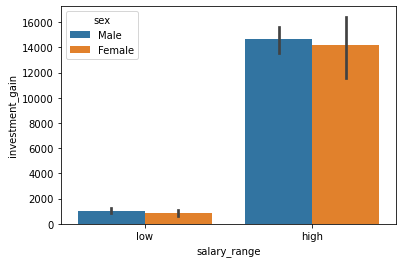

In [14]:
sb.barplot(x='salary_range',y='investment_gain',data=salary,estimator=np.std,hue='sex')

### Relationship between years of education and salary range

<AxesSubplot:xlabel='salary_range', ylabel='education_years'>

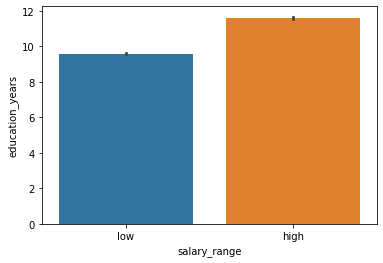

In [15]:
sb.barplot(x='salary_range',y='education_years',data=salary)

### Relationship between weekly hours worked and salary range

<AxesSubplot:xlabel='salary_range', ylabel='weekly_hours'>

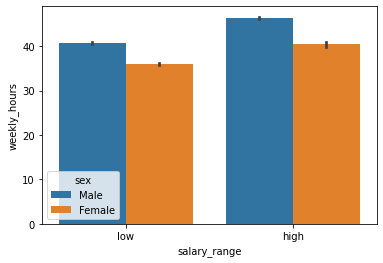

In [16]:
sb.barplot(x='salary_range',y='weekly_hours',data=salary, hue='sex')

### Relationship between age and salary range

<AxesSubplot:xlabel='salary_range', ylabel='age'>

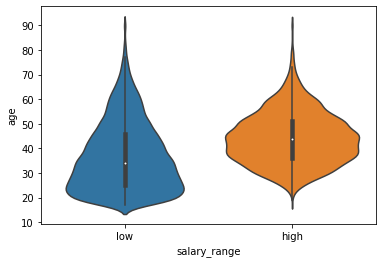

In [17]:
sb.violinplot(x='salary_range',y='age',data=salary)

### Relationship between weekly hours and age

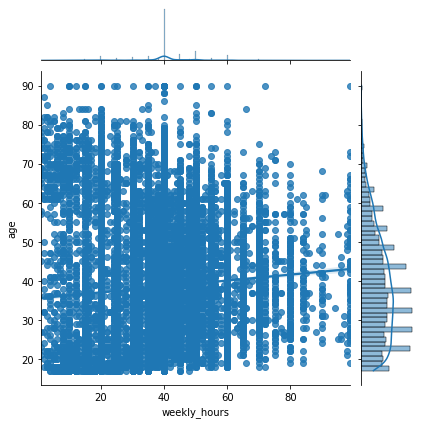

In [18]:
sb.jointplot(x='weekly_hours',y='age',data=salary, kind='reg')

### Relationship between investment gain of people of different race

Text(0.5, 1.0, '- Investment Gain of Different Races -')

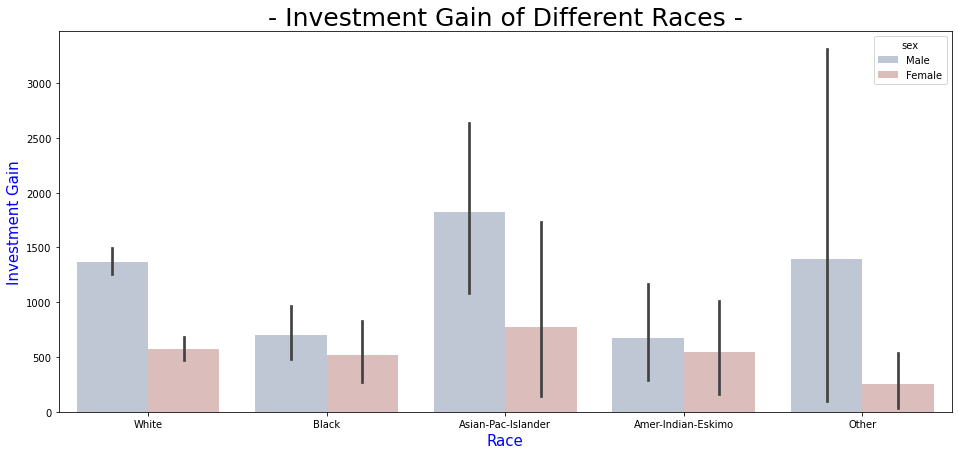

In [19]:
plt.figure(figsize =(16,7))
sb.barplot(x='race',y='investment_gain',data=salary, hue='sex',palette='vlag')

plt.xlabel('Race',fontsize = 15,color='blue')
plt.ylabel('Investment Gain',fontsize = 15,color='blue')
plt.title('- Investment Gain of Different Races -',fontsize = 25)

### Countries with most people in low salary range

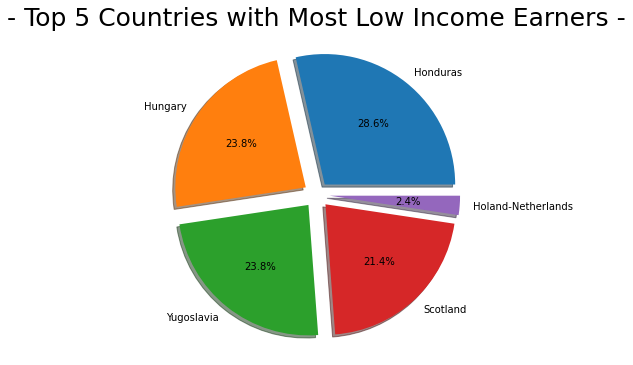

In [20]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['low'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

### Countries with most people in high salary range

Text(0.5, 1.0, '- Top 5 Countries with Most Number of High Income Earners -')

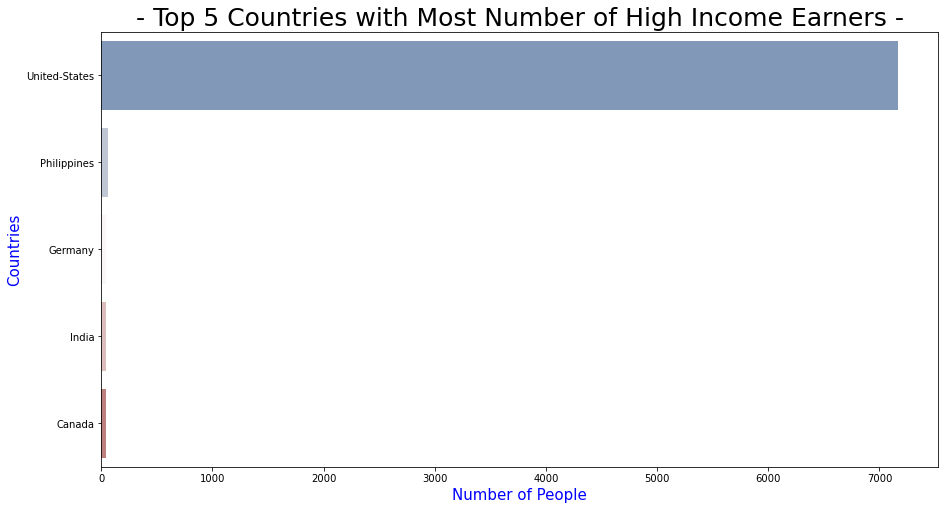

In [21]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().head(5)

x = top5
y = top5['high'].index.tolist()

plt.figure(figsize =(15,8))
sb.barplot(x=x,y=y,data=salary,palette='vlag')

plt.xlabel('Number of People',fontsize = 15,color='blue')
plt.ylabel('Countries',fontsize = 15,color='blue')
plt.title('- Top 5 Countries with Most Number of High Income Earners -',fontsize = 25)

### Education

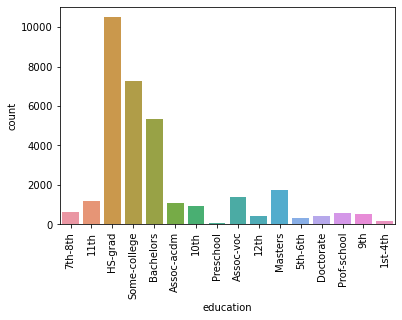

In [22]:
plot = sb.countplot(salary['education'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

### Age of participants

<AxesSubplot:xlabel='age'>

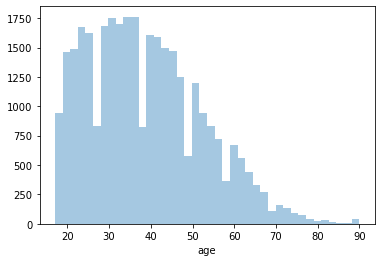

In [23]:
sb.distplot(salary['age'],kde=False,bins=40)

### Salary Range (Target)

[Text(0, 0, 'low'), Text(1, 0, 'high')]

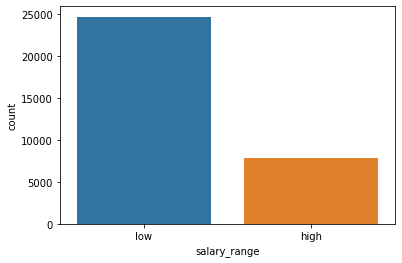

In [24]:
plot = sb.countplot(salary['salary_range'])
plot.set_xticklabels(plot.get_xticklabels())

---

# Data Preprocessing

### Variables Overview
**Starting**<br>
salary		： Original Dataset, Replace '?' to 'NaN'<br>
new_salary	: Remove Missing Values<br>
new_salary1	: Remove Outliers<br>

**Split data**<br>
X : prediction features<br>
y : target variable <br>
X_train, X_test, y_train, y_test<br>

X_train_num : training numerical set<br>
X_train_cat : training categorical set<br>

X_test_num : testing numerical set<br>
X_test_cat : testing categorical set<br>

**One Hot Encoding**<br>
X_train_cat_1 ~ 8<br>
X_test_cat_1 ~ 8<br>
X_train_num_tr : Standardize (numeric)<br>
combine : combined all one hot encoded train set (categorical)<br>
combine_test : combined all one hot encoded test set (categorical)<br>
X_train_tr : Finalize Train Set<br>
X_test_tr : Finalize Test Set<br>

**Model Training**<br>
model 1 - 6<br>

**Model Testing**<br>
model 1 - 7

### Handle Missing Data

In [25]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [26]:
#Drop First - for new_salary 
import copy
new_salary = copy.deepcopy(salary)
new_salary.dropna(inplace = True)
print('Original Attribute Shape:',salary.shape)
print('Clean Attribute Shape:',new_salary.shape)

Original Attribute Shape: (32561, 16)
Clean Attribute Shape: (30153, 16)


Result: 32561-30153 = 2408 missing values (have been removed)

In [27]:
new_salary.isnull().sum()

work_type          0
age                0
weight             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
investment_gain    0
investment_loss    0
company_size       0
weekly_hours       0
country            0
salary_range       0
dtype: int64

In [28]:
new_salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
10,Local-gov,30,44566,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,833,80,United-States,low


In [29]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


---

### Remove Outlier

<AxesSubplot:>

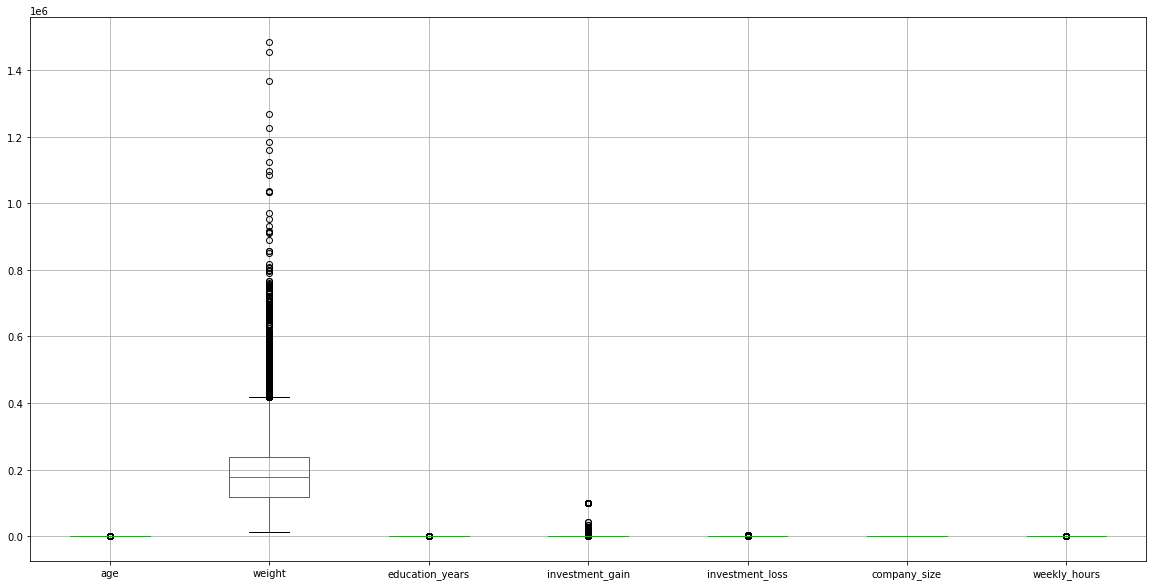

In [30]:
new_salary.boxplot(figsize=(20,10))

This is when we notice weight has many outliers, hence we have decided to drop the weight feature afterwards

In [31]:
Z = (new_salary-new_salary.mean())/new_salary.std()
Z.describe()

,age,company_size,education_years,investment_gain,investment_loss,weekly_hours,weight
count,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04
mean,-3.581816e-17,-7.069374e-17,6.150355e-17,-9.425831e-19,1.555262e-17,-1.042143e-16,-1.358498e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.632126e+00,-1.738309e+00,-3.576911e+00,-1.474647e-01,-2.185333e-01,-3.332833e+00,-1.665962e+00
25%,-7.946425e-01,-8.629447e-01,-4.396992e-01,-1.474647e-01,-2.185333e-01,-7.762613e-02,-6.830671e-01
50%,-1.094289e-01,5.416791e-03,-4.754771e-02,-1.474647e-01,-2.185333e-01,-7.762613e-02,-1.076257e-01
75%,6.519197e-01,8.562710e-01,1.128907e+00,-1.474647e-01,-2.185333e-01,3.397081e-01,4.527480e-01
max,3.925718e+00,1.745641e+00,2.305361e+00,1.335236e+01,1.055805e+01,4.846918e+00,1.225594e+01


In [32]:
import scipy.stats as stats
import numpy as np
print('Number of rows before discarding outliers = %d' % (new_salary.shape[0]))

#since only numerical attributes outlier can be removed, so we have to declare them before processing
num_attribute = ['age','weight','education_years','investment_gain','investment_loss','company_size','weekly_hours']
z_scores = stats.zscore(new_salary[num_attribute])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
#We only selected the z score less than equal to 3 and more than -3

new_salary1 = new_salary[filtered_entries]

print('Number of rows after discarding outliers = %d' % new_salary1.shape[0])

Number of rows before discarding outliers = 30153
Number of rows after discarding outliers = 27613


- We only selected the z score between the range 3 and -3
- The scores outside of the range will be considered an outlier and is discarded

### Check Duplicate

In [33]:
dups = new_salary1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


*There are no duplicate data left*

---

### Separate output vector from input matrix 

In [34]:
new_salary1

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,Local-gov,40,26929,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,796,40,United-States,low
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low


## Feature Selection

In [35]:
#Drop targeted variable from the matrix X as the input matrix Y, and also the unused feature "weight"
X_drop = ['salary_range', 'weight']
X = new_salary1.drop(X_drop, axis = 1)

#Convert the target attribute's value into boolean type (easy when process, since it only has "high" and "low")
new_salary1['salary_range'] = [1 if x=='high' else 0 for x in new_salary1['salary_range']]
y = new_salary1['salary_range']

In [36]:
#Show the shape and type class of the dataFrame for matrix X and Y
print("Shape original dataFrame", new_salary1.shape)
print("X shape",  X.shape, "type = ", type(X))
print("Y shape",  y.shape, "type = ", type(y))

Shape original dataFrame (27613, 16)
X shape (27613, 14) type =  <class 'pandas.core.frame.DataFrame'>
Y shape (27613,) type =  <class 'pandas.core.series.Series'>


### Split the Dataset - Training, Testing

In [37]:
#Load the python library - sklearn  
from sklearn.model_selection import train_test_split

#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

print('Original Dataset =', X.shape)
print('Training Dataset =', X_train.shape)
print('Testing Dataset =', X_test.shape)

Original Dataset = (27613, 14)
Training Dataset = (22090, 14)
Testing Dataset = (5523, 14)


### Split the input matrix - numerical and categorical sets

In [38]:
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_train_num = X_train.drop(cat_attribute, axis = 1)
X_train_cat = X_train[cat_attribute]

In [39]:
print(X_train_num.shape)
print(X_train_cat.shape)

(22090, 6)
(22090, 8)


### Standardize numeric data

In [40]:
from sklearn.preprocessing import StandardScaler

#Standardisation of the Numerical Attribute
X_train_num_tr = StandardScaler().fit_transform(X_train_num)

In [41]:
print('Mean:\n',X_train_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_train_num_tr.std (axis=0))

Mean:
 [-4.63187659e-17 -1.85275064e-16 -1.80128534e-17 -9.97140100e-18
 -3.40957583e-17  1.01643959e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1.]


In [42]:
X_train_num_tr  #transformed into ndArray

array([[-1.24690729, -0.45794306, -0.24826905, -0.03799699,  0.63229247,
        -0.03557418],
       [-1.40255447, -1.27997803, -0.24826905, -0.03799699, -1.57134843,
         1.82526817],
       [-0.85778932, -0.45794306, -0.24826905, -0.03799699,  0.05864627,
        -0.03557418],
       ...,
       [ 2.17733079, -0.45794306, -0.24826905, -0.03799699,  1.12199044,
        -0.03557418],
       [-1.0912601 , -1.69099551, -0.24826905, -0.03799699, -1.37896708,
         2.29047876],
       [-1.0912601 ,  1.18612686, -0.24826905, -0.03799699,  0.50986797,
        -0.03557418]])

### One-hot encode categorical data

In [43]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22090 entries, 13063 to 27116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_type       22090 non-null  object
 1   education       22090 non-null  object
 2   marital_status  22090 non-null  object
 3   occupation      22090 non-null  object
 4   relationship    22090 non-null  object
 5   race            22090 non-null  object
 6   sex             22090 non-null  object
 7   country         22090 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [44]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_train_cat1=X_train_cat.work_type
X_train_cat2=X_train_cat.education
X_train_cat3=X_train_cat.marital_status
X_train_cat4=X_train_cat.occupation
X_train_cat5=X_train_cat.relationship
X_train_cat6=X_train_cat.race
X_train_cat7=X_train_cat.sex
X_train_cat8=X_train_cat.country

In [45]:
#One hot Encoding for Training Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Training Set Values
cat1_encoder.fit(X_train_cat1)
cat2_encoder.fit(X_train_cat2)
cat3_encoder.fit(X_train_cat3)
cat4_encoder.fit(X_train_cat4)
cat5_encoder.fit(X_train_cat5)
cat6_encoder.fit(X_train_cat6)
cat7_encoder.fit(X_train_cat7)
cat8_encoder.fit(X_train_cat8)

#Return the One Hot Encoded value as another Variable
X_train_cat_1=cat1_encoder.transform(X_train_cat1)
X_train_cat_2=cat2_encoder.transform(X_train_cat2)
X_train_cat_3=cat3_encoder.transform(X_train_cat3)
X_train_cat_4=cat4_encoder.transform(X_train_cat4)
X_train_cat_5=cat5_encoder.transform(X_train_cat5)
X_train_cat_6=cat6_encoder.transform(X_train_cat6)
X_train_cat_7=cat7_encoder.transform(X_train_cat7)
X_train_cat_8=cat8_encoder.transform(X_train_cat8)

In [46]:
print("These are the number of different values per category")
print(X_train_cat_1.shape)
print(X_train_cat_2.shape)
print(X_train_cat_3.shape)
print(X_train_cat_4.shape)
print(X_train_cat_5.shape)
print(X_train_cat_6.shape)
print(X_train_cat_7.shape)
print(X_train_cat_8.shape)

These are the number of different values per category
(22090, 7)
(22090, 14)
(22090, 7)
(22090, 14)
(22090, 6)
(22090, 5)
(22090, 1)
(22090, 40)


The categorical attributes have been transformed through One Hot Encoding

In [47]:
combine=np.hstack((X_train_cat_1,X_train_cat_2,X_train_cat_3,X_train_cat_4,X_train_cat_5,X_train_cat_6,X_train_cat_7,X_train_cat_8))
combine.shape

(22090, 94)

Combine all One Hot Encoded Category Lable into one Numpy Array

### Finalize Train Set

In [48]:
#Combine Categorical and Numerical Data Together for Training Set

#Original Traning Set
X_train_tr=np.hstack((X_train_num_tr,combine))

print(X_train_tr.shape)          
print(y_train.shape)

(22090, 100)
(22090,)


In [49]:
y_train.value_counts()

0    16988
1     5102
Name: salary_range, dtype: int64

*Observation: May cause Imbalanced Class result

## Preprocessing on Test set

*The preprocessing steps are almost same with training set*

In [50]:
#Seperate Numerical and Categorical Data for Processing
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_test_num = X_test.drop(cat_attribute, axis = 1)
X_test_cat = X_test[cat_attribute]
print(X_test_num.shape)
print(X_test_cat.shape)

(5523, 6)
(5523, 8)


### Standardize on Test Set 

In [51]:
from sklearn.preprocessing import StandardScaler
X_test_num_tr = StandardScaler().fit_transform(X_test_num)

In [52]:
print('Mean:\n',X_test_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_test_num_tr.std (axis=0))
X_test_num_tr  #transformed into ndArray

Mean:
 [-1.25435301e-16 -4.50280568e-17 -3.02331238e-17 -1.28651591e-17
  8.10505022e-17  2.50227344e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1.]


array([[-1.24620531, -0.46539946, -0.24297621, -0.03653474,  1.26297822,
        -0.0340742 ],
       [ 0.15281513, -0.05215168,  1.95273124, -0.03653474, -1.71294566,
        -0.0340742 ],
       [-1.01303524, -0.46539946, -0.24297621, -0.03653474, -1.40061403,
        -0.0340742 ],
       ...,
       [ 1.00777206,  0.7743439 , -0.24297621, -0.03653474, -1.27076829,
        -0.95839542],
       [ 1.86272899, -0.46539946, -0.24297621, -0.03653474, -0.30218929,
        -0.40380269],
       [-0.46897173, -0.46539946, -0.24297621, -0.03653474, -0.80051617,
        -0.0340742 ]])

### One Hot Encoding on Test Set

In [53]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_test_cat1=X_test_cat.work_type
X_test_cat2=X_test_cat.education
X_test_cat3=X_test_cat.marital_status
X_test_cat4=X_test_cat.occupation
X_test_cat5=X_test_cat.relationship
X_test_cat6=X_test_cat.race
X_test_cat7=X_test_cat.sex
X_test_cat8=X_test_cat.country

In [54]:
#One hot Encoding for Testing Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Testing Set Values
cat1_encoder.fit(X_test_cat1)
cat2_encoder.fit(X_test_cat2)
cat3_encoder.fit(X_test_cat3)
cat4_encoder.fit(X_test_cat4)
cat5_encoder.fit(X_test_cat5)
cat6_encoder.fit(X_test_cat6)
cat7_encoder.fit(X_test_cat7)
cat8_encoder.fit(X_test_cat8)

#Return the One Hot Encoded value as another Variable
X_test_cat_1=cat1_encoder.transform(X_test_cat1)
X_test_cat_2=cat2_encoder.transform(X_test_cat2)
X_test_cat_3=cat3_encoder.transform(X_test_cat3)
X_test_cat_4=cat4_encoder.transform(X_test_cat4)
X_test_cat_5=cat5_encoder.transform(X_test_cat5)
X_test_cat_6=cat6_encoder.transform(X_test_cat6)
X_test_cat_7=cat7_encoder.transform(X_test_cat7)
X_test_cat_8=cat8_encoder.transform(X_test_cat8)

In [55]:
print("These are the number of different values per category")
print(X_test_cat_1.shape)
print(X_test_cat_2.shape)
print(X_test_cat_3.shape)
print(X_test_cat_4.shape)
print(X_test_cat_5.shape)
print(X_test_cat_6.shape)
print(X_test_cat_7.shape)
print(X_test_cat_8.shape)

These are the number of different values per category
(5523, 7)
(5523, 14)
(5523, 7)
(5523, 14)
(5523, 6)
(5523, 5)
(5523, 1)
(5523, 40)


In [56]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine_test=np.hstack((X_test_cat_1,X_test_cat_2,X_test_cat_3,X_test_cat_4,X_test_cat_5,X_test_cat_6,X_test_cat_7,X_test_cat_8))
combine_test.shape

(5523, 94)

### Finalize Test Set

In [57]:
#Combine Categorical and Numerical Data Together for Testing Dataset
X_test_tr=np.hstack((X_test_num_tr,combine_test))

print(X_test_tr.shape) 
print(y_test.shape)      

(5523, 100)
(5523,)


### Summary of Preprocessed Data

In [58]:
print('\nOriginal Dataset')
print('Salary:',new_salary1.shape)
print('\nPreprocessed and Combined Training Set')
print('X_train_tr:',X_train_tr.shape)
print('y_train   :',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr:',X_test_tr.shape)
print('y_test   :',y_test.shape)


Original Dataset
Salary: (27613, 16)

Preprocessed and Combined Training Set
X_train_tr: (22090, 100)
y_train   : (22090,)

Preprocessed and Combined Testing Set
X_test_tr: (5523, 100)
y_test   : (5523,)


### Data Preprocessing End
---

# Training and Cross Validation Functions

These are the functions that will be used in training and cross validating the model

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

#Declaration of performance indicators
scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

y_pred_arr = {} #store the predictions for each classifiers
overview_acc = pd.DataFrame(columns=["Accuracy"]) #an overview of training accuracy

### Training Function

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_train_tr)
    overview_acc.loc[clf[i]] = round(accuracy_score(y_pred, y_train)*100,4)  #store trained accuracy to list

### Cross Validation Function

In [61]:
def cross_val(model, i, x = X_train_tr, y = y_train):
    model.fit(x, y)
    y_pred = cross_validate(model, x, y, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values] #store cross validate accuracy to list

---
# Model Performance Evaluation Functions

These are the functions that will be used to evaluate the performance of each model 

### Classification Report Function

In [62]:
from sklearn.metrics import classification_report
def classifyReport(model, i, x = X_train_tr, y = y_train):
    model.fit(x, y)
    y_pred = cross_val_predict(model, x, y, cv= 5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y, y_pred_arr[clf[i]]))
    print()

### Confusion Matrix Function

In [63]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i, x = X_train_tr, y = y_train):
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n")

### Cross Validation Summary Graph

In [64]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [65]:
def performance_sum():
    
    #list of scores
    precision_sco = [float(i) for i in overview['Precision']]
    recall_sco    = [float(i) for i in overview['Recall']]
    f1_sco        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_sco,recall_sco,f1_sco], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

### Precision-Recall Curve

In [66]:
def plot_precision_vs_recall(model, i, x = X_train_tr, y = y_train):
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_arr[clf[i]])
    ax.plot(recalls, precisions, linewidth=3, label = clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

###  ROC Curve

In [67]:
def plot_roc_curve(i, y = y_train):
    fpr, tpr, treshold = roc_curve(y, y_pred_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

---
# Model Training
6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SGD)
6. Multi-layer Perceptron (MLP)

In [68]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

#Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)

#Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=1)

#Model 4 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=20)

#Model 5 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

#Model 6 - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model6 = MLPClassifier()

### Train Accuracy 

In [69]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    train(a, i)

### Cross Validation

In [70]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    cross_val(a, i)

## Comparison of algorithms' accuracy with and without Cross Validation

### Before performing Cross Validation

In [71]:
overview_acc

,Accuracy
Logistic Regression,85.0973
Decision Tree Classifier,99.9864
Random Forest Classifier,99.9864
KNN Classifier,86.1702
Stochastic Gradient Descent,84.1603
MLP Classifier,90.6609


- Decision Tree Classifier and Random Forest Classifier are the algorithms with overfitting issues where the model fits against the training data too well. 
- Hence, we have to perform k-fold cross validation on all algorithms to resolve overfitting issues.

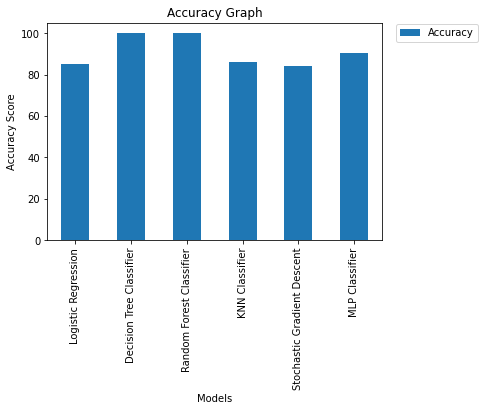

In [72]:
pd.DataFrame([float(i) for i in overview_acc.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

### After performing cross validation

In [73]:
pd.DataFrame(overview['Accuracy'])

,Accuracy
Logistic Regression,0.8494
Decision Tree Classifier,0.8004
Random Forest Classifier,0.8513
KNN Classifier,0.8495
Stochastic Gradient Descent,0.8443
MLP Classifier,0.8402


- We can observe that the accuracy has decreased after performing cross validation. 
- The models that were previously overfitted has now been resolved.
- The overall accuracy has been decreased, so we have to perform fine tuning to improve the model. 

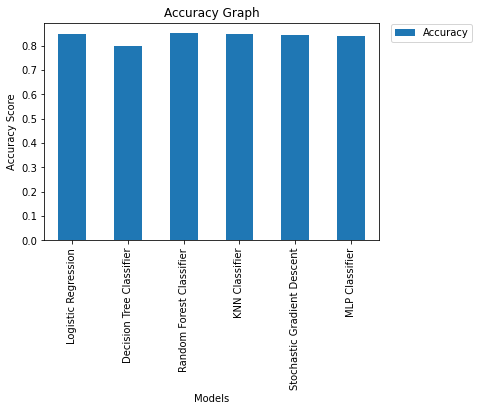

In [74]:
pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

### Classification Report

In [75]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     16988
           1       0.72      0.57      0.64      5102

    accuracy                           0.85     22090
   macro avg       0.80      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     16988
           1       0.57      0.59      0.58      5102

    accuracy                           0.80     22090
   macro avg       0.72      0.73      0.72     22090
weighted avg       0.80      0.80      0.80     22090


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     16988
           1       0.71      0.60      0.65      5102

    accuracy                    

### Confusion Matrix

In [76]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[15859  1129]
 [ 2197  2905]]

Accuracy: 0.8494341330918967
TN, FP, FN, TP :  15859 1129 2197 2905


Decision Tree Classifier
Confusion Matrix:
[[14681  2307]
 [ 2102  3000]]

Accuracy: 0.8004074241738343
TN, FP, FN, TP :  14681 2307 2102 3000


Random Forest Classifier
Confusion Matrix:
[[15744  1244]
 [ 2040  3062]]

Accuracy: 0.8513354459031236
TN, FP, FN, TP :  15744 1244 2040 3062


KNN Classifier
Confusion Matrix:
[[15778  1210]
 [ 2115  2987]]

Accuracy: 0.849479402444545
TN, FP, FN, TP :  15778 1210 2115 2987


Stochastic Gradient Descent
Confusion Matrix:
[[15865  1123]
 [ 2317  2785]]

Accuracy: 0.8442734268899955
TN, FP, FN, TP :  15865 1123 2317 2785


MLP Classifier
Confusion Matrix:
[[15620  1368]
 [ 2033  3069]]

Accuracy: 0.8460389316432775
TN, FP, FN, TP :  15620 1368 2033 3069




- The majority predicted of true positive is the MLP classifier, but for the best overall performance is still belongs to the Random Forest Classifier. 

---

### Cross Validation Graph

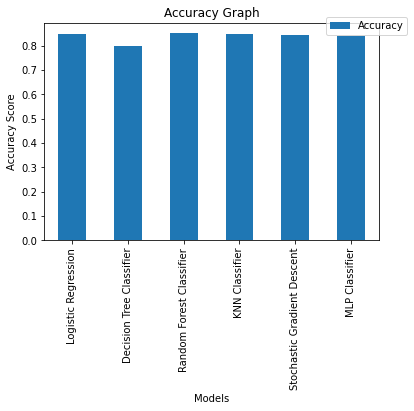

In [77]:
cv_sum()

### Overall Performance

In [78]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.4282,0.0045,0.8494,0.7201,0.5694,0.7705
Decision Tree Classifier,0.1031,0.0052,0.8004,0.5653,0.5880,0.7228
Random Forest Classifier,1.2548,0.0688,0.8513,0.7113,0.6002,0.7783
KNN Classifier,0.0042,1.1163,0.8495,0.7116,0.5855,0.7735
Stochastic Gradient Descent,0.1128,0.0046,0.8443,0.7148,0.5458,0.7597
MLP Classifier,11.6645,0.0077,0.8402,0.6644,0.6243,0.7701


- Random Forest Classifier achieves an accuracy of 85% and f1 score of  77.8% which is the highest among all algorithms. 
- However, its precision is lower than KNN Classifier, Stochastic Gradient Descent and also Logistic Regression. 
- The recall of Random Forest Classifier of 60% only loses to MLP Classifier which has the highest recall of 62.4%

### Overall Performance Graph

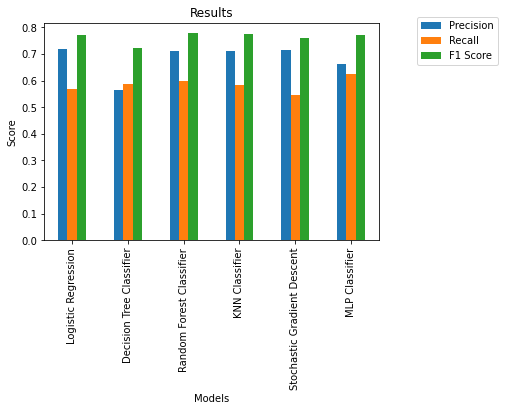

In [79]:
performance_sum()

- As can be observed from the graph, Random Forest Classifier has the best overall performance when compared with the other algorithms.

## Precision-Recall Curve

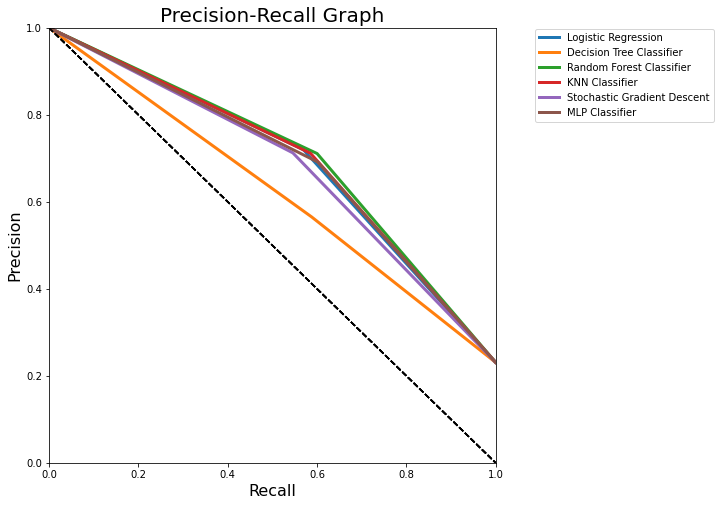

In [80]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

- We can see that the Random Forest Classifier is the closest to the top right corner, while the Decision Tree Classifier is far away from the top right corner. 
- Therefore, we can consider that the Random Forest Classifier is a good model for this dataset. 

## ROC Curve

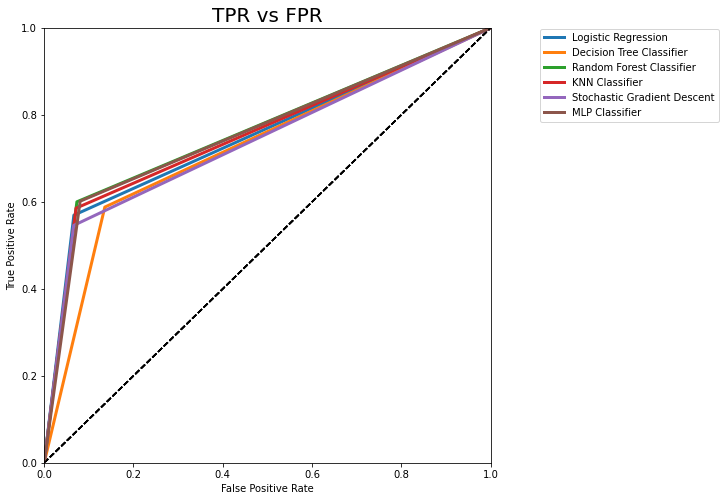

In [81]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

- The closest to the top left corner is belongs to the Random Forest Classifier again, while the Decision tree classifier is also the same as the bad classifier in this roc curve. 

## AUC Score

In [82]:
roc_auc_score_arr = [roc_auc_score(y_train, y_pred_arr[clf[i]]) for i in range(6)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.751463
Decision Tree Classifier,0.726101
Random Forest Classifier,0.763464
KNN Classifier,0.757115
Stochastic Gradient Descent,0.739879
MLP Classifier,0.760501


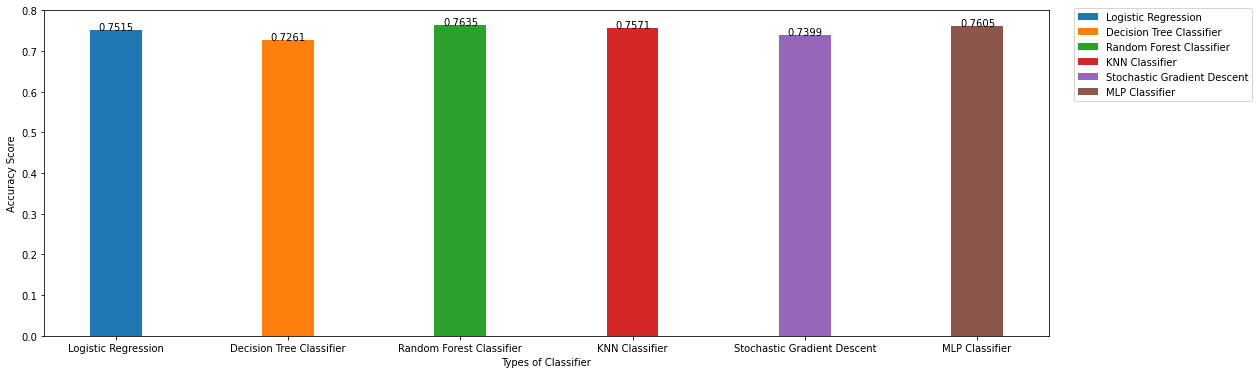

In [83]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()

- Random Forest Classifier has AUC score of 0.7635 which is the highest among all algorithms. 
- Hence, we can conclude that out of all the algorithms, Random Forest Classifier can most accurately distinguish between classes.

---
# Fine Tune Model
<br/>
So, now we have determined that Random Forest Classifier is the most suitable algorithm, we shall now fine tune the model. Each model comes with different hyperparameters. Hyperparameters are the settings of a machine learning that needs to be set prior to training. To find the best hyperparameter values for these settings, we shall use the Grid Search.

In [84]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
                'bootstrap': [True, False],
                'max_features': [5, 8, 9, 10, 11],
                'n_estimators': [80, 100, 110, 120]
             }

# Create a based model
rf = RandomForestClassifier(n_estimators=20, max_features=None, random_state=1)

# Instantiate the grid search model
grid_search_forest = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
print("Performing Grid Search CV...")

#performing grid search
grid_search_forest.fit(X_train_tr,y_train)
print('Done Grid Search!')

Performing Grid Search CV...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Done Grid Search!


In [85]:
print('Best Hyperparameter Settings:', grid_search_forest.best_params_)
print('Best Hyperparameter Settings:', grid_search_forest.best_score_)

Best Hyperparameter Settings: {'bootstrap': True, 'max_features': 10, 'n_estimators': 110}
Best Hyperparameter Settings: 0.8506565607421598


In [86]:
#Get the best model learnt from the grid search
best_forest_model = grid_search_forest.best_estimator_
best_forest_model

RandomForestClassifier(max_features=10, n_estimators=110, random_state=1)

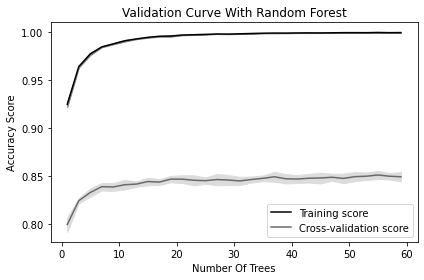

In [87]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 60, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train_tr, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

---
# Testing the Model
<br/>
Tests the Hypertuned Random Forest Classifier and compare it with the other algorithms

In [88]:
best_model = grid_search_forest.best_estimator_
best_model

RandomForestClassifier(max_features=10, n_estimators=110, random_state=1)

In [89]:
#reset the overview dataframe & y_pred accuracy 
overview = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 score"])
y_pred_arr = {}

#original classifier
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

#new Data
clf.append("Random Forest Classifier(HyperTuned)")

In [90]:
##Model 1 - Logistic Regression
model1 = LogisticRegression(max_iter=100000)
cross_val(model1, 0, X_test_tr, y_test)

##Model 2 - Decision Tree
model2 = DecisionTreeClassifier(random_state=1)
cross_val(model2, 1, X_test_tr, y_test)

##Model 3 - Random Forest 
model3 = RandomForestClassifier(random_state=1)
cross_val(model3, 2, X_test_tr, y_test)

##Model 4 - K-Nearest Neighbour (KNN)
model4 = KNeighborsClassifier(n_neighbors=20)
cross_val(model4, 3, X_test_tr, y_test)

##Model 5 - Stochastic Gradient Descent (SGD)
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)
cross_val(model5, 4, X_test_tr, y_test)

##Model 6 - Multi-layer Perceptron (MLP)
model6 = MLPClassifier()
cross_val(model6, 5, X_test_tr, y_test)

##Model7 - Random Forest (Tuned Hyperparameter)
model7 = best_model
cross_val(model7, 6, X_test_tr, y_test)

### Classification Report (Test Set)

In [91]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    classifyReport(a, i, X_test_tr, y_test)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4248
           1       0.71      0.57      0.63      1275

    accuracy                           0.85      5523
   macro avg       0.79      0.75      0.77      5523
weighted avg       0.84      0.85      0.84      5523


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4248
           1       0.57      0.57      0.57      1275

    accuracy                           0.80      5523
   macro avg       0.72      0.72      0.72      5523
weighted avg       0.80      0.80      0.80      5523


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4248
           1       0.69      0.57      0.62      1275

    accuracy                    

### Confusion Matrix (Test Set)

In [92]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    confusionMatrix(a, i, X_test_tr, y_test)

Logistic Regression
Confusion Matrix:
[[3950  298]
 [ 544  731]]

Accuracy: 0.8475466232120225
TN, FP, FN, TP :  3950 298 544 731


Decision Tree Classifier
Confusion Matrix:
[[3693  555]
 [ 552  723]]

Accuracy: 0.799565453557849
TN, FP, FN, TP :  3693 555 552 723


Random Forest Classifier
Confusion Matrix:
[[3917  331]
 [ 551  724]]

Accuracy: 0.8403041825095057
TN, FP, FN, TP :  3917 331 551 724


KNN Classifier
Confusion Matrix:
[[3961  287]
 [ 580  695]]

Accuracy: 0.8430200977729495
TN, FP, FN, TP :  3961 287 580 695


Stochastic Gradient Descent
Confusion Matrix:
[[3951  297]
 [ 600  675]]

Accuracy: 0.837588267246062
TN, FP, FN, TP :  3951 297 600 675


MLP Classifier
Confusion Matrix:
[[3808  440]
 [ 503  772]]

Accuracy: 0.8292594604381677
TN, FP, FN, TP :  3808 440 503 772


Random Forest Classifier(HyperTuned)
Confusion Matrix:
[[3920  328]
 [ 549  726]]

Accuracy: 0.8412094875973203
TN, FP, FN, TP :  3920 328 549 726




### Accuracy Graph (Test Set)

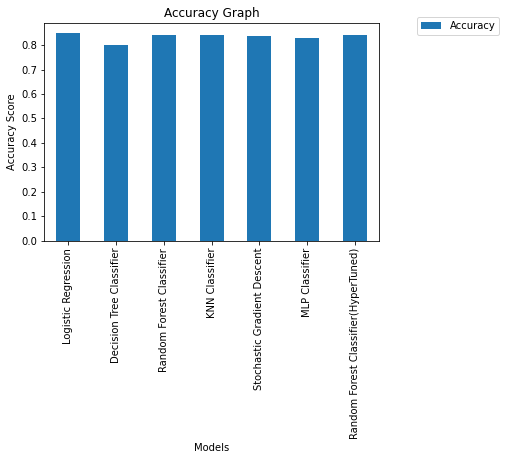

In [93]:
cv_sum()

### Overall Performance (Test Set)

In [94]:
overview

,Fit time,Score time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.0538,0.0026,0.8475,0.7106,0.5733,0.7689
Decision Tree Classifier,0.0221,0.0026,0.7996,0.5658,0.5671,0.7179
Random Forest Classifier,0.3343,0.0214,0.8403,0.6858,0.5678,0.7599
KNN Classifier,0.0014,0.0935,0.8430,0.7085,0.5451,0.7585
Stochastic Gradient Descent,0.0320,0.0025,0.8376,0.7055,0.5294,0.7459
MLP Classifier,2.9711,0.0035,0.8289,0.6484,0.5663,0.7472
Random Forest Classifier(HyperTuned),0.3654,0.0230,0.8412,0.6884,0.5694,0.7611


- The accuracy, precision, recall and f1 score of the Hyperparameter Tuned Random Forest Classifier is higher than the Random Forest Classifier before Hyperparameter Tuning. 

### Overall Performance Chart (Test Set)

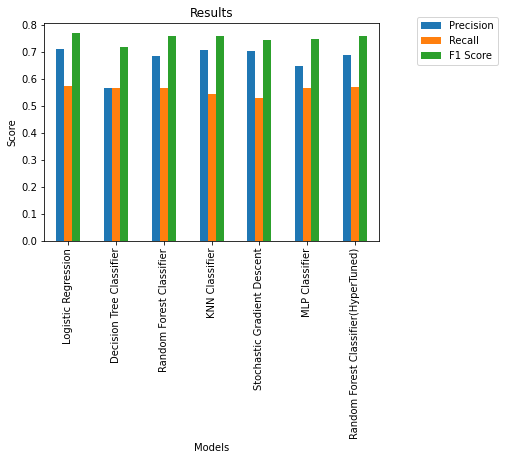

In [95]:
performance_sum()

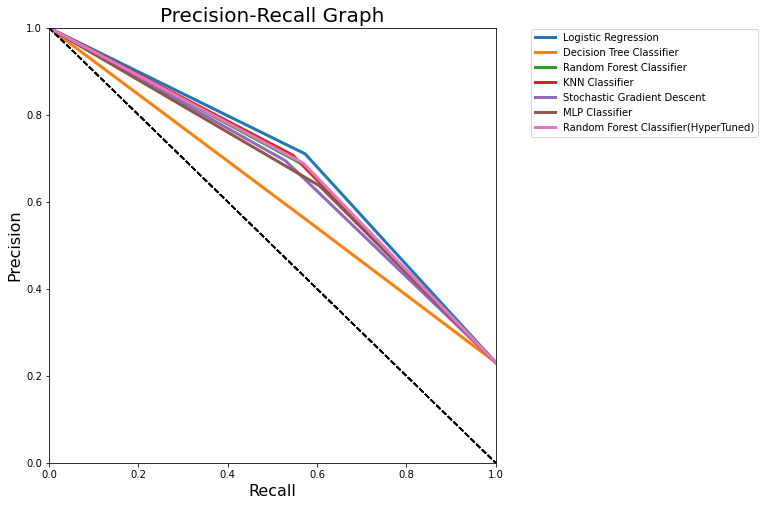

In [96]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i, X_test_tr, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.6, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

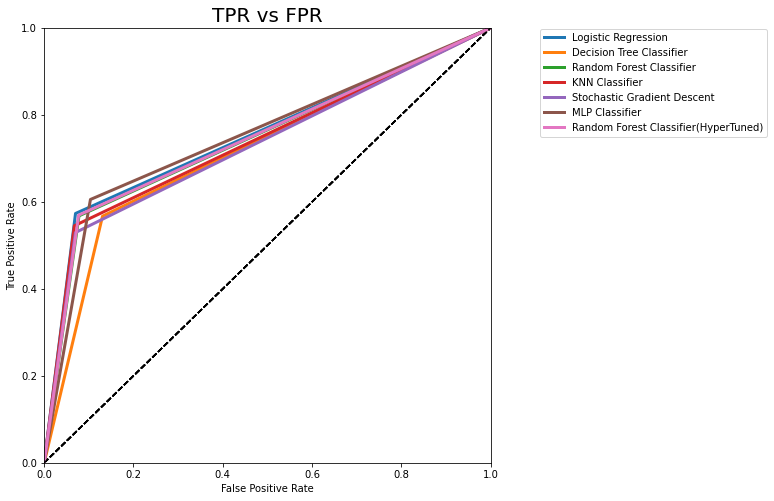

In [97]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_roc_curve(i, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

### AUC Score(Test Set)

In [98]:
roc_auc_score_arr = [roc_auc_score(y_test, y_pred_arr[clf[i]]) for i in range(7)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.751591
Decision Tree Classifier,0.718205
Random Forest Classifier,0.744962
KNN Classifier,0.738768
Stochastic Gradient Descent,0.729748
MLP Classifier,0.750956
Random Forest Classifier(HyperTuned),0.746099


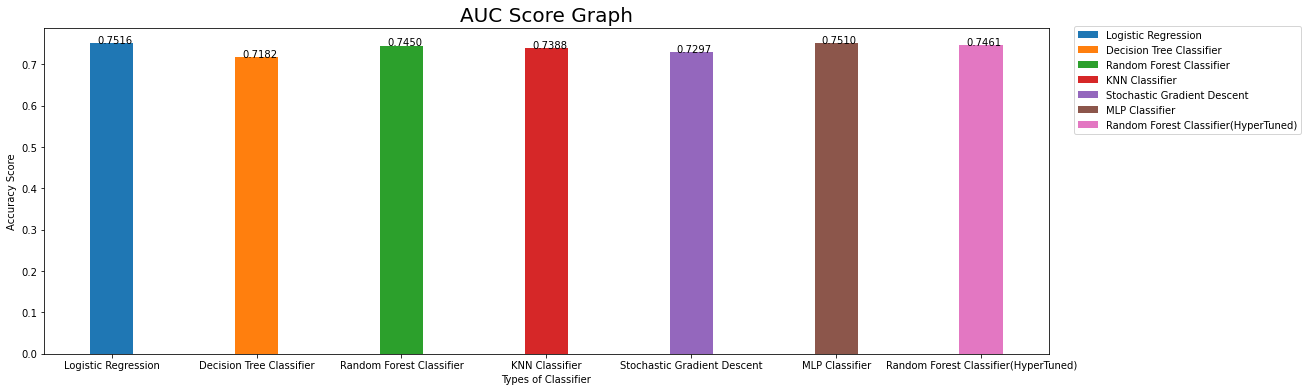

In [99]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.title('AUC Score Graph', fontsize=20)
plt.show()

- Tuned Random Forest Classifier performs slightly poorer than MLP Classifier and Logistic Regression. 
- However, it performs better than the Random Forest Classifier before tuning and the other algorithms.

# Conclusion

We conclude that Logistic Regression and Random Forest Classifier can be used to predict the salary range of individuals given the dataset with an accuracy of about 74.6%.